In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv(r"C:/Users/SURYA KOMMU/Downloads/diabetes_data.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
data.shape

(768, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


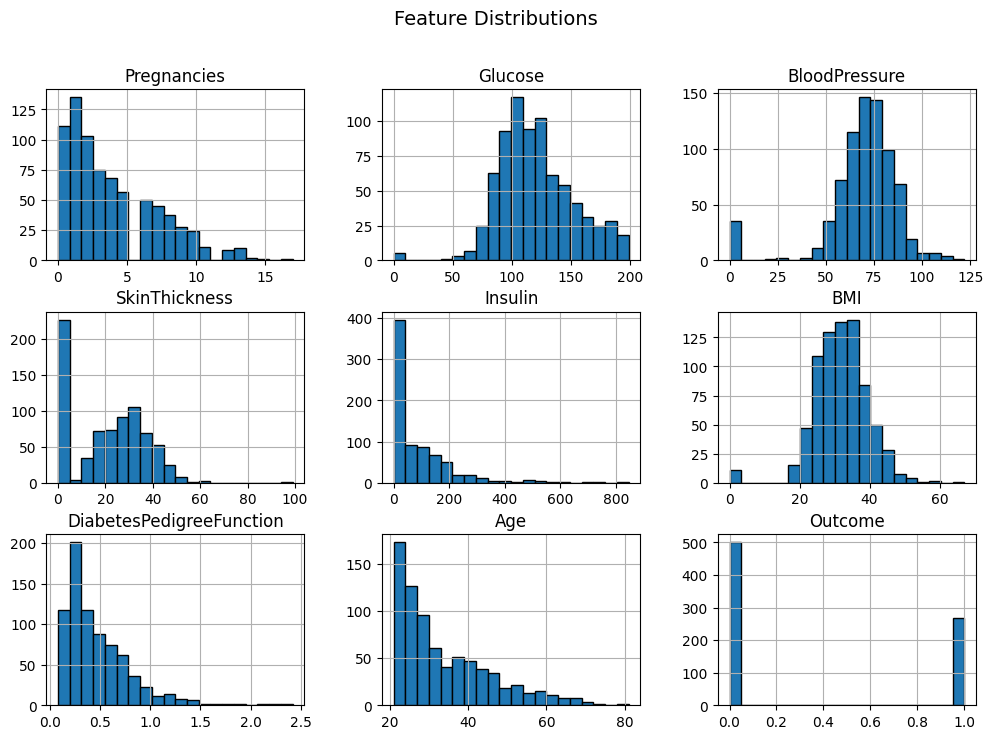

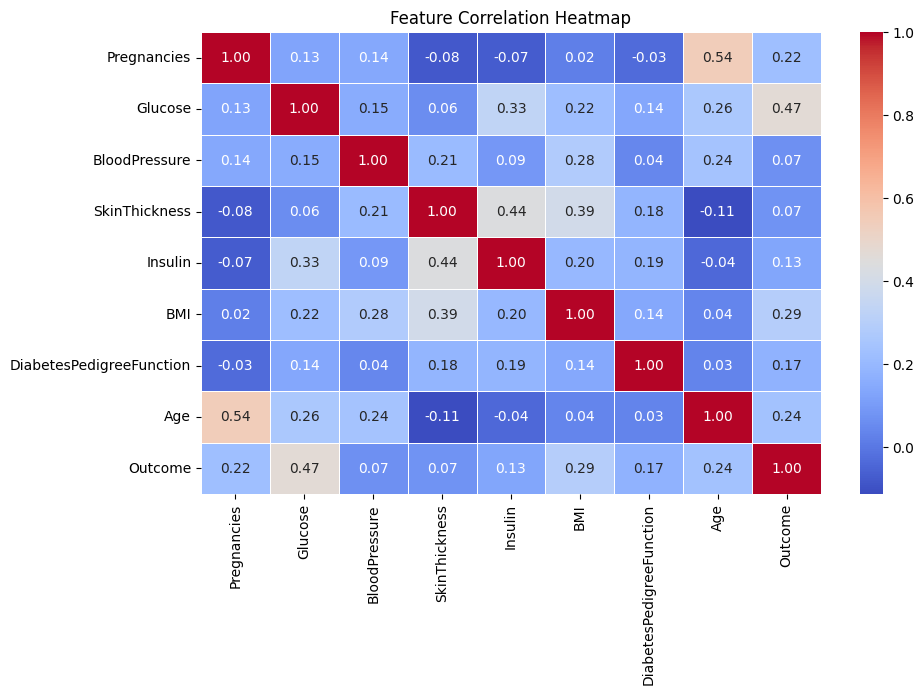

Model Accuracy: 70.78%
Mean Squared Error: 0.2922
R-squared Score: -0.2833
Mean Absolute Error: 0.2922


In [4]:
# ## Diabetes Prediction - EDA, Model Training, and Evaluation (Logistic Regression)

# ### Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn import preprocessing

# ### Step 2: Load the Dataset
file_path = "C:/Users/SURYA KOMMU/Downloads/diabetes_data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Display basic information
display(df.info())
display(df.head())

# ### Step 3: Exploratory Data Analysis (EDA)

# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# ### Step 4: Data Preprocessing

# Handle missing values by replacing zeros with the median in certain columns
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    df[col] = df[col].replace(0, df[col].median())

# Split features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ### Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# ### Step 6: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


In [7]:
import pickle

In [9]:
filename = "diabetes_model.sav"
pickle.dump(model, open(filename, "wb"))

# Save the scaler
scaler_filename = "scaler.sav"
pickle.dump(scaler, open(scaler_filename, "wb"))

# Load the saved model
loaded_model = pickle.load(open(filename, "rb"))

# Predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# ### Step 6: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

print(f"Trained model saved as {filename}")
print(f"Scaler saved as {scaler_filename}")

# Print feature names
print("Feature Names:")
for column in df.drop(columns=["Outcome"]).columns:
    print(column)


Model Accuracy: 70.78%
Mean Squared Error: 0.2922
R-squared Score: -0.2833
Mean Absolute Error: 0.2922
Trained model saved as diabetes_model.sav
Scaler saved as scaler.sav
Feature Names:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
